<a href="https://colab.research.google.com/github/KhangTruong220162/Problem-Set-1/blob/main/Khang_Dynamic_Macroeconomics_PS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Set 1
Dynamic Macroeconomics

Xavier Bautista

Truong Vi Khang

22/3/2025

**Question 3**

b.


In [5]:
import numpy as np
import pandas as pd

def rouwenhorst(N, p):
    """Generate Rouwenhorst transition matrix for AR(1) process."""
    if N == 2:
        return np.array([[p, 1 - p], [1 - p, p]])

    # Recursively compute P_(N-1)
    P_prev = rouwenhorst(N - 1, p)

    # Create a new zero matrix for expansion
    P_new = np.zeros((N, N))

    # Fill in the expanded transition matrix
    P_new[:-1, :-1] += p * P_prev  # Top-left block
    P_new[:-1, 1:] += (1 - p) * P_prev  # Top-right block
    P_new[1:, :-1] += (1 - p) * P_prev  # Bottom-left block
    P_new[1:, 1:] += p * P_prev  # Bottom-right block

    # Adjust middle rows to ensure valid probabilities
    P_new[1:-1, :] /= 2

    return P_new

# Parameters
N = 7  # Number of states
gamma_1 = 0.85
p = (1 + gamma_1) / 2

# Compute transition matrix
transition_matrix = rouwenhorst(N, p)

# Convert to DataFrame for better display
df_matrix = pd.DataFrame(transition_matrix)

# Display DataFrame using Pandas (alternative to ace_tools)
print("Fixed Transition Matrix (γ₁ = 0.85):")
print(df_matrix)


Fixed Transition Matrix (γ₁ = 0.85):
              0         1         2         3         4         5  \
0  6.263980e-01  0.304734  0.061770  0.006678  0.000406  0.000013   
1  5.078903e-02  0.646988  0.257284  0.041451  0.003350  0.000136   
2  4.118030e-03  0.102914  0.659505  0.207172  0.024925  0.001340   
3  3.338943e-04  0.012435  0.155379  0.663704  0.155379  0.012435   
4  2.707251e-05  0.001340  0.024925  0.207172  0.659505  0.102914   
5  2.195068e-06  0.000136  0.003350  0.041451  0.257284  0.646988   
6  1.779785e-07  0.000013  0.000406  0.006678  0.061770  0.304734   

              6  
0  1.779785e-07  
1  2.195068e-06  
2  2.707251e-05  
3  3.338943e-04  
4  4.118030e-03  
5  5.078903e-02  
6  6.263980e-01  


c.

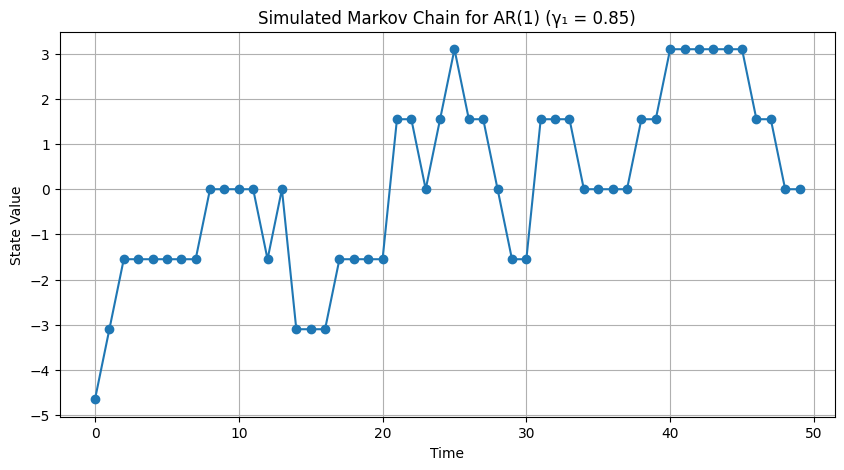

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure transition_matrix and states are defined before running
N = 7  # Number of states
gamma_1 = 0.85
p = (1 + gamma_1) / 2

def rouwenhorst(N, p):
    """Generate Rouwenhorst transition matrix for AR(1) process."""
    if N == 2:
        return np.array([[p, 1 - p], [1 - p, p]])

    # Recursively compute P_(N-1)
    P_prev = rouwenhorst(N - 1, p)

    # Create a new zero matrix for expansion
    P_new = np.zeros((N, N))

    # Fill in the expanded transition matrix
    P_new[:-1, :-1] += p * P_prev  # Top-left block
    P_new[:-1, 1:] += (1 - p) * P_prev  # Top-right block
    P_new[1:, :-1] += (1 - p) * P_prev  # Bottom-left block
    P_new[1:, 1:] += p * P_prev  # Bottom-right block

    # Adjust middle rows to ensure valid probabilities
    P_new[1:-1, :] /= 2

    return P_new

# Generate transition matrix
transition_matrix = rouwenhorst(N, p)

# Define state space (grid of discretized AR(1) values)
m = np.sqrt(N - 1)
sigma = np.sqrt(1 / (1 - gamma_1**2))
states = np.linspace(-m * sigma, m * sigma, N)

# Set seed
np.random.seed(2025)

# Simulate Markov Chain
T = 50
state_index = np.random.choice(N, p=np.ones(N) / N)  # Start uniformly
simulated_states = [states[state_index]]

for _ in range(T - 1):
    transition_probs = transition_matrix[state_index]  # Get transition probabilities
    transition_probs /= transition_probs.sum()  # Ensure proper probability distribution
    state_index = np.random.choice(N, p=transition_probs)  # Sample next state
    simulated_states.append(states[state_index])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(range(T), simulated_states, marker='o', linestyle='-')
plt.title("Simulated Markov Chain for AR(1) (γ₁ = 0.85)")
plt.xlabel("Time")
plt.ylabel("State Value")
plt.grid(True)
plt.show()


d.

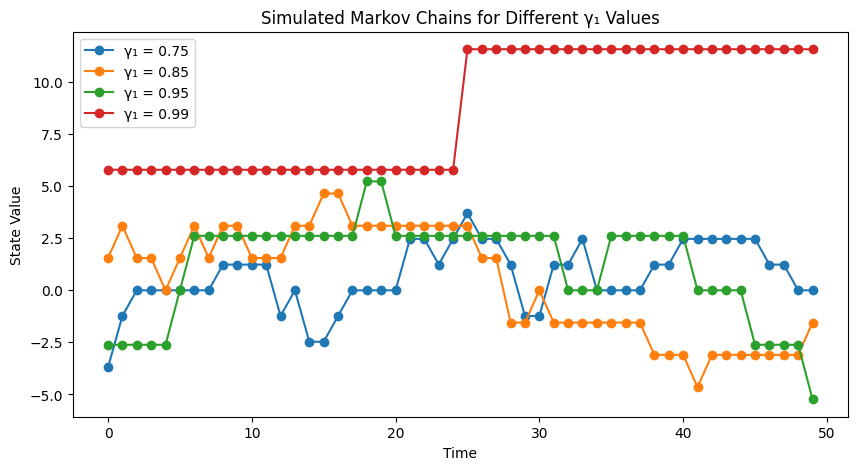

In [8]:
gamma_values = [0.75, 0.85, 0.95, 0.99]
T = 50
np.random.seed(2025)  # Keep the same seed for consistency

plt.figure(figsize=(10, 5))

for gamma_1 in gamma_values:
    sigma = np.sqrt(1 / (1 - gamma_1**2))
    states = np.linspace(-m * sigma, m * sigma, N)
    p = (1 + gamma_1) / 2
    transition_matrix = rouwenhorst(N, p)

    state_index = np.random.choice(N, p=np.ones(N) / N)  # Start uniformly
    simulated_states = [states[state_index]]

    for _ in range(T - 1):
        state_index = np.random.choice(N, p=transition_matrix[state_index])
        simulated_states.append(states[state_index])

    plt.plot(range(T), simulated_states, marker='o', linestyle='-', label=f'γ₁ = {gamma_1}')

plt.title("Simulated Markov Chains for Different γ₁ Values")
plt.xlabel("Time")
plt.ylabel("State Value")
plt.legend()
plt.show()


**Question 5**

d.

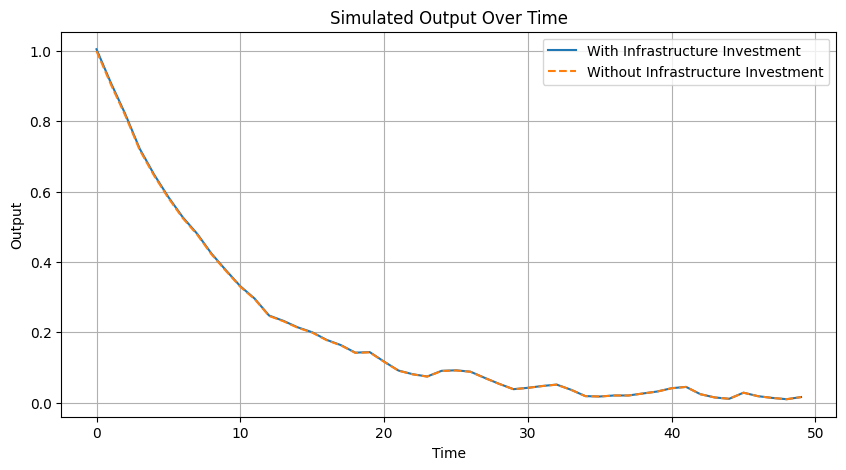

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 50                      # number of periods
alpha = 0.36               # capital share
beta = 0.96                # discount factor
delta = 0.05               # depreciation
lambda_ = 0.1              # effectiveness of public investment
g_share = 0.05             # public investment share of output
rho = 0.9                  # AR(1) persistence
sigma = 0.01               # AR(1) shock std

# Initialize arrays
k_with = np.zeros(T+1)
k_without = np.zeros(T+1)
y_with = np.zeros(T)
y_without = np.zeros(T)
z = np.ones(T+1)
A_with = np.zeros(T)
A_without = np.ones(T)  # no g_t → A = z_t

# Initial values
k_with[0] = 1
k_without[0] = 1
z[0] = 1

# Simulation
for t in range(T):
    # Shock process
    z[t+1] = rho * z[t] + np.random.normal(0, sigma)

    # With public investment
    A_with[t] = z[t] * (1 + lambda_ * g_share)
    y_with[t] = A_with[t] * (k_with[t] ** alpha)
    g_t = g_share * y_with[t]
    c_t = y_with[t] - g_t - delta * k_with[t]
    k_with[t+1] = (1 - delta) * k_with[t] + y_with[t] - c_t - g_t

    # Without public investment
    y_without[t] = z[t] * (k_without[t] ** alpha)
    c0_t = y_without[t] - delta * k_without[t]
    k_without[t+1] = (1 - delta) * k_without[t] + y_without[t] - c0_t

# Plot results
plt.figure(figsize=(10,5))
plt.plot(range(T), y_with, label='With Infrastructure Investment')
plt.plot(range(T), y_without, label='Without Infrastructure Investment', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Output")
plt.title("Simulated Output Over Time")
plt.legend()
plt.grid(True)
plt.show()


e.

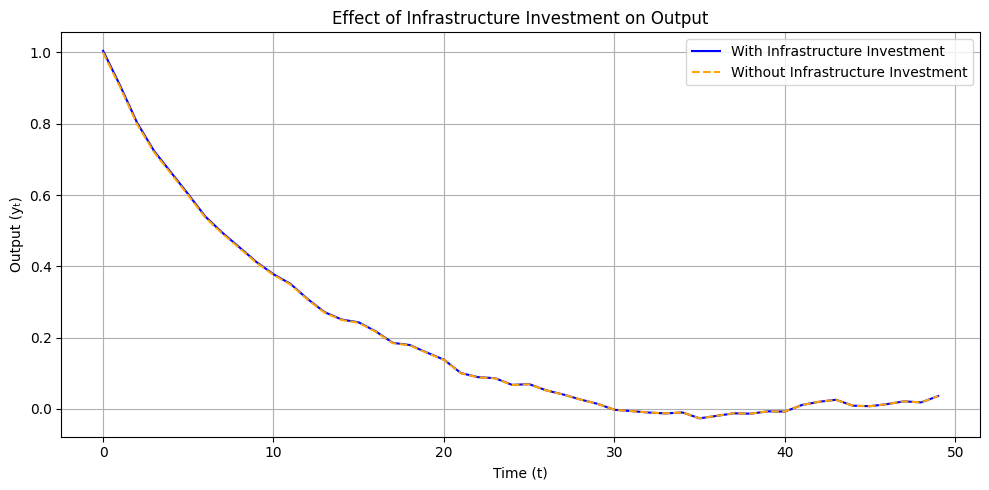

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 50                      # number of periods
alpha = 0.36               # capital share
beta = 0.96                # discount factor
delta = 0.05               # depreciation
lambda_ = 0.1              # effectiveness of public investment
g_share = 0.05             # public investment share of output
rho = 0.9                  # AR(1) persistence
sigma = 0.01               # AR(1) shock std

# Initialize arrays
k_with = np.zeros(T+1)
k_without = np.zeros(T+1)
y_with = np.zeros(T)
y_without = np.zeros(T)
z = np.ones(T+1)
A_with = np.zeros(T)
A_without = np.ones(T)  # no g_t → A = z_t

# Initial values
k_with[0] = 1
k_without[0] = 1
z[0] = 1

# Simulation
for t in range(T):
    # Shock process
    z[t+1] = rho * z[t] + np.random.normal(0, sigma)

    # With public investment
    A_with[t] = z[t] * (1 + lambda_ * g_share)
    y_with[t] = A_with[t] * (k_with[t] ** alpha)
    g_t = g_share * y_with[t]
    c_t = y_with[t] - g_t - delta * k_with[t]
    k_with[t+1] = (1 - delta) * k_with[t] + y_with[t] - c_t - g_t

    # Without public investment
    y_without[t] = z[t] * (k_without[t] ** alpha)
    c0_t = y_without[t] - delta * k_without[t]
    k_without[t+1] = (1 - delta) * k_without[t] + y_without[t] - c0_t

# Plot results
plt.figure(figsize=(10,5))
plt.plot(range(T), y_with, label='With Infrastructure Investment', color='blue')
plt.plot(range(T), y_without, label='Without Infrastructure Investment', linestyle='--', color='orange')
plt.xlabel("Time (t)")
plt.ylabel("Output (yₜ)")
plt.title("Effect of Infrastructure Investment on Output")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
